<a href="https://colab.research.google.com/github/JasleenDutta/Task-1/blob/main/The_Spark_Foundation_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation GRIP**

#**Author - Jasleen Dutta**

#**DATA SCIENCE AND BUSINESS ANALYTICS INTERN**

#**TASK -1 - Prediction using Supervised ML**

**Predict the percentage of an student based on the no. of study**
**hours.**


IMPORT LIBRARIES


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing Data set

In [ ]:
url= "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
df.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**SIMPLE ANALYSIS**

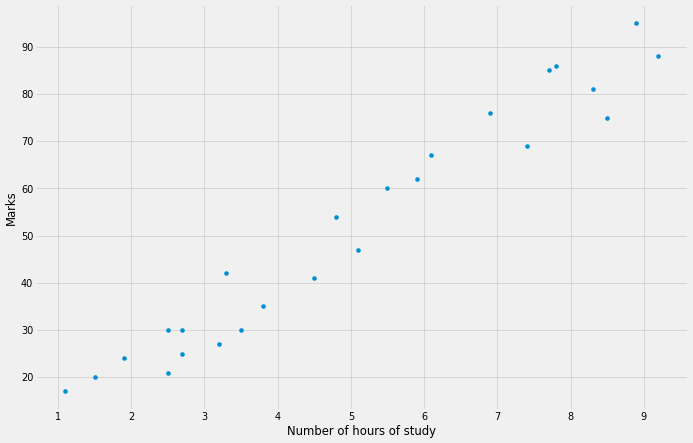

In [ ]:
# data analysis
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10),dpi=50)
plt.scatter(df["Hours"],df['Scores'])
plt.xlabel('Number of hours of study')
plt.ylabel('Marks')
plt.show()

We can see that the number of hours of study is highly correlated with the marks of the student

**Data Pre-Processing**

Splitting the data into training and test set so as to see if the model fits well on the general data

In [ ]:
# converting to numpy
x = np.array(df['Hours']).reshape(-1,1)
y = np.array(df['Scores'])
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

**Distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


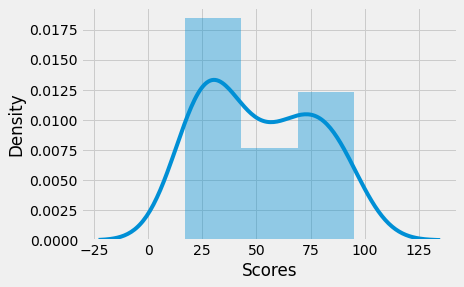

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


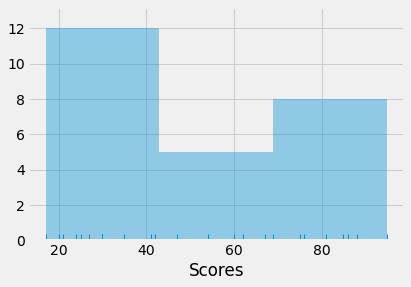

In [ ]:
sns.distplot(df["Scores"])
plt.show()
sns.distplot(df["Scores"], kde=False, rug=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


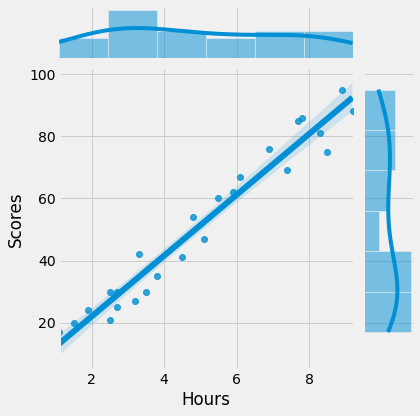

In [ ]:
sns.jointplot(df['Hours'], df['Scores'], kind = "reg")
plt.show()

**Linear Regression**

Linear regression is a linear approach to modelling the relationship between a scalar response and one or
more explanatory variables.


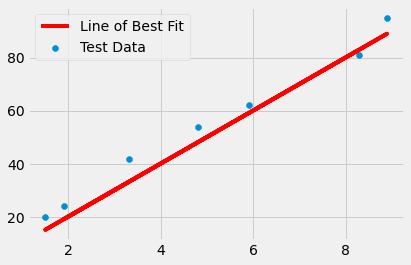

mean squared error : 29.51532124792996


In [ ]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(x_train,y_train)
# predictions
y_pred = lr.predict(x_test)
# making plot
plt.scatter(x_test,y_test,label="Test Data")
plt.plot(x_test,y_pred,color='red',label='Line of Best Fit')
plt.legend()
plt.show()
# mean squarred error
print(f"mean squared error : {mean_squared_error(y_test,y_pred)}")

we can see that the line fits the testing data decently well. So, we can use this model to predict the scores of
the new studets given the amount of time they studied

**Plotting regression line**

In [ ]:
df.head


<bound method NDFrame.head of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

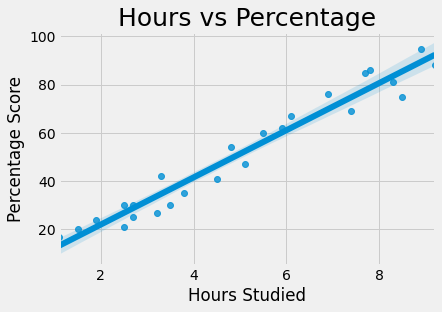

In [ ]:
ax = sns.regplot(x="Hours", y="Scores", data =df)
plt.title('Hours vs Percentage', fontsize=25)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


**Training the Data**

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training complete.")


Training complete.


In [ ]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
df1 = pd.DataFrame({'Hours':[1.5,3.2,7.4,2.5,5.9], 'Actual': y_test, 'Predicted': y_pred})
df1


,Hours,Actual,Predicted
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


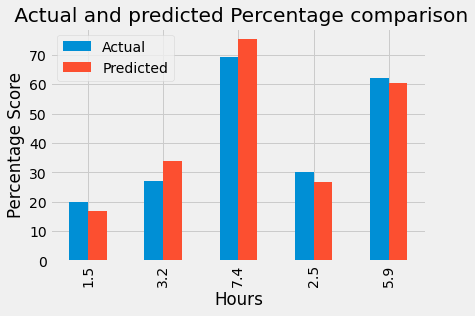

In [ ]:
df1.plot(x= "Hours", y=["Actual", "Predicted"], kind="bar")
plt.grid(linewidth='1')
plt.title(" Actual and predicted Percentage comparison")
plt.ylabel('Percentage Score')
plt.show()

**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [ ]:
hour = 9.25
own_pred = regressor.predict([[hour]])
print("No of Hours = {}".format(hour))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


**Predictions on User Input**

In [ ]:
# real time prediction
hours = float(input("Enter the number of hours : "))
print(f"the student is likely to score {(lr.predict([[hours]])[0]):.2f} marks")

Enter the number of hours : 10
the student is likely to score 99.92 marks
